In [1]:
import pandas as pd
import glacierml as gl
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import gaussian_kde

pd.set_option('display.max_columns',None)

2024-04-25 20:18:26.515817: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-25 20:18:26.557353: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-25 20:18:26.557998: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-25 20:18:27.195742: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
home_path = '/home/simonhans/glacierml'
[
        data_path, RGI_path, glathida_path, 
        coregistration_testing_path, 
        arch_test_path, LOO_path
] = gl.set_paths(home_path)

In [3]:
df = pd.read_pickle(os.path.join(
    coregistration_testing_path,
    '1','rgi_est_raw.pkl'
))
for i in range(2,5,1):
    dft = pd.read_pickle(
        os.path.join(
            coregistration_testing_path,str(i),'rgi_est_raw.pkl'
        )
    )
    df = pd.merge(df,dft, how = 'inner', on = list(dft)[:-1])
#### Add Farinotti mean thickness estimates ####
ref_pth = 'reference_thicknesses/'
ref = pd.DataFrame()
for file in os.listdir(ref_pth):
    if 'Farinotti' in file:
        file_reader = pd.read_csv('reference_thicknesses/' + file)
        ref = pd.concat([ref, file_reader], ignore_index = True) 
ref = ref.rename(columns = {
     'Farinotti Mean Thickness':'FMT',
})
ref = ref[[
     'FMT',
     'RGIId',
]]

df = pd.merge(df, ref, how = 'inner', on = 'RGIId')
df

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,Zmax,Zmed,Slope,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,region,1,2,3,4,FMT
0,RGI60-01.00001,G213177E63689N,20090703,-9999999,-146.8230,63.6890,1,2,0.360,1936,2725,2385,42.0,346,839,0,0,0,0,9,9,NaN,01,21.314960,8.447033,23.854256,8.106798,19.988910
1,RGI60-01.00002,G213332E63404N,20090703,-9999999,-146.6680,63.4040,1,2,0.558,1713,2144,2005,16.0,162,1197,0,0,0,0,9,9,NaN,01,60.257912,42.337460,46.357689,46.295078,29.413269
2,RGI60-01.00003,G213920E63376N,20090703,-9999999,-146.0800,63.3760,1,2,1.685,1609,2182,1868,18.0,175,2106,0,0,0,0,9,9,NaN,01,57.910549,38.217888,43.299702,44.644806,31.862368
3,RGI60-01.00004,G213880E63381N,20090703,-9999999,-146.1200,63.3810,1,2,3.681,1273,2317,1944,19.0,195,4175,0,0,0,0,9,9,NaN,01,60.153568,41.410114,46.185169,49.339008,45.454704
4,RGI60-01.00005,G212943E63551N,20090703,-9999999,-147.0570,63.5510,1,2,2.573,1494,2317,1914,16.0,181,2981,0,0,0,0,9,9,NaN,01,63.602055,47.311508,50.682724,52.660984,43.040817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216496,RGI60-19.02748,G322268E53986S,20020502,-9999999,-37.7325,-53.9860,19,3,0.042,310,510,-999,29.9,315,255,0,0,0,0,9,9,NaN,19,56.629074,46.200932,25.621563,36.738445,12.593311
216497,RGI60-19.02749,G323864E54831S,20030207,-9999999,-36.1361,-54.8310,19,3,0.567,330,830,-999,23.6,200,1130,0,0,0,0,9,9,NaN,19,68.299080,58.724110,25.801462,49.130451,20.532068
216498,RGI60-19.02750,G322698E54188S,20030207,-9999999,-37.3018,-54.1884,19,3,4.118,10,1110,-999,16.8,308,4329,0,0,0,1,9,9,NaN,19,88.381310,75.017441,33.856411,79.966522,55.923466
216499,RGI60-19.02751,G269573E68866S,19870101,-9999999,-90.4266,-68.8656,19,1,0.011,170,270,-999,0.4,122,106,0,0,0,1,9,9,AQ6C10200013,19,149.955475,134.418747,78.360886,112.721451,10.181019


In [4]:
glac1 = gl.coregister_data(data_path,'1')
glac2 = gl.coregister_data(data_path,'2')
glac3 = gl.coregister_data(data_path,'3')
glac4 = gl.coregister_data(data_path,'4')

df1 = pd.merge(df,glac1, how = 'inner', on = 'RGIId')
df2 = pd.merge(df,glac2, how = 'inner', on = 'RGIId')
df3 = pd.merge(df,glac3, how = 'inner', on = 'RGIId')
df4 = pd.merge(df,glac4, how = 'inner', on = 'RGIId')

df = df.drop(df[df['RGIId'].duplicated(keep = False)].index)

df = df.sample(frac = 1,random_state = 0)
df = df.reset_index().drop('index', axis = 1)

mean residual: -9.0
residual std 51.0
Sorting data...
Calculating point density...

mean residual: -3.0
residual std 23.0
Sorting data...
Calculating point density...

mean residual: -2.0
residual std 21.0
Sorting data...
Calculating point density...

mean residual: -3.0
residual std 28.0
Sorting data...
Calculating point density...



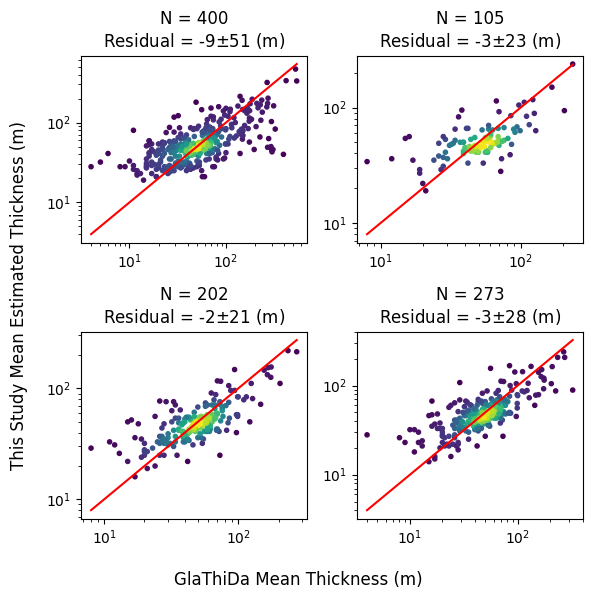

In [5]:
fig, ax = plt.subplots(2,2,figsize = (6,6),
#                        sharex = True, sharey = True
                      )

for n, dataset in enumerate((df1, df2,
                             df3, df4
                            )):
    data = dataset
    data = data.drop(data[data['RGIId'].duplicated(keep = False)].index)

    data_1 = np.round(data[n+1],0)
    data_3 = np.round(data['Thickness'],0)

    res_mean = np.round(np.mean(data_1 - data_3),0)
    res_std = np.round(np.std(data_1-data_3),0)
    print(f'mean residual: {res_mean}\nresidual std {res_std}')
#     data_1 = data['FMT'] / 1e3 * data['Area_x']

    print('Sorting data...')
    x_1 = np.sort(data_1)
    y_1 = 1. * np.arange(len(data_1)) / (len(data_1) - 1)

    x_3 = np.sort(data_3)
    y_3 = 1. * np.arange(len(data_3)) / (len(data_3) - 1)

    print('Calculating point density...')
    print('')
    # Calculate the point density
    xy = np.vstack([np.log10(data_1),np.log10(data_3)])

    z = gaussian_kde(xy)(xy)   
    if n == 0:
        ax[0,0].scatter(
                data_3,
                data_1,
                c = z,
                cmap = 'viridis',
                marker = '.'
            )    
        ax[0,0].set_xscale('log')
        ax[0,0].set_yscale('log')
        ax[0,0].set_title(
            f'N = {len(data)}\nResidual = {res_mean:.0f}$\pm${res_std:.0f} (m)'
                         )
        ax[0,0].plot(
            (data_3.min(), data_3.max()),
            (data_3.min(), data_3.max()),
            color = 'red',
            linestyle = '-'
        )
    if n == 1:
        ax[0,1].scatter(
                data_3,
                data_1,
                c = z,
                cmap = 'viridis',
                marker = '.'
            ) 
        
        ax[0,1].set_xscale('log')
        ax[0,1].set_yscale('log')
        ax[0,1].set_title(
            f'N = {len(data)}\nResidual = {res_mean:.0f}$\pm${res_std:.0f} (m)'
                         )
        ax[0,1].plot(
            (data_3.min(), data_3.max()),
            (data_3.min(), data_3.max()),
            color = 'red',
            linestyle = '-'
        )
    if n == 2:
        ax[1,0].scatter(
                data_3,
                data_1,
                c = z,
                cmap = 'viridis',
                marker = '.'
            )    
        
        ax[1,0].set_xscale('log')
        ax[1,0].set_yscale('log')
        ax[1,0].set_title(
            f'N = {len(data)}\nResidual = {res_mean:.0f}$\pm${res_std:.0f} (m)'
        )
        ax[1,0].plot(
            (data_3.min(), data_3.max()),
            (data_3.min(), data_3.max()),
            color = 'red',
            linestyle = '-'
        )
    if n == 3:
        ax[1,1].scatter(
                data_3,
                data_1,
                c = z,
                cmap = 'viridis',
                marker = '.'
        )    
        ax[1,1].set_xscale('log')
        ax[1,1].set_yscale('log')
        ax[1,1].set_title(
            f'N = {len(data)}\nResidual = {res_mean:.0f}$\pm${res_std:.0f} (m)'
        )
        ax[1,1].plot(
            (data_3.min(), data_3.max()),
            (data_3.min(), data_3.max()),
            color = 'red',
            linestyle = '-'
        )

fig.supylabel('This Study Mean Estimated Thickness (m)')
fig.supxlabel('GlaThiDa Mean Thickness (m)')

plt.tight_layout()